In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_excel("user_list1.xlsx")

In [5]:
df.head()

,bundestag_id,nachname,vorname,wp,fraktion,full_name,twitter_handle,account_type,activity
0,11005000,Abdi,Sanae,20,Fraktion der Sozialdemokratischen Partei Deuts...,Sanae Abdi,_sanaeabdi,person,1.0
1,11005001,Abel,Valentin,20,Fraktion der Freien Demokratischen Partei,Valentin Abel,Valentin_C_Abel,person,1.0
2,11005002,Abraham,Knut,20,Fraktion der Christlich Demokratischen Union/C...,Knut Abraham,Knut_Abraham,person,1.0
3,11005003,Adler,Katja,20,Fraktion der Freien Demokratischen Partei,Katja Adler,katjadler,person,1.0
4,11005004,Aeffner,Stephanie,20,Fraktion BÜNDNIS 90/DIE GRÜNEN,Stephanie Aeffner,s_aeffner,person,1.0


In [6]:
df['fraktion'] = df['fraktion'].replace(['Fraktion der Sozialdemokratischen Partei Deutschlands','Fraktion der Freien Demokratischen Partei',"Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union","Fraktion BÜNDNIS 90/DIE GRÜNEN","Fraktion DIE LINKE.","Alternative für Deutschland"],['SPD','FDP',"CDU","Gruene","Linke","AFD"])

Franktion in Abkürzungen umwandeln

In [7]:
df.head()

,bundestag_id,nachname,vorname,wp,fraktion,full_name,twitter_handle,account_type,activity
0,11005000,Abdi,Sanae,20,SPD,Sanae Abdi,_sanaeabdi,person,1.0
1,11005001,Abel,Valentin,20,FDP,Valentin Abel,Valentin_C_Abel,person,1.0
2,11005002,Abraham,Knut,20,CDU,Knut Abraham,Knut_Abraham,person,1.0
3,11005003,Adler,Katja,20,FDP,Katja Adler,katjadler,person,1.0
4,11005004,Aeffner,Stephanie,20,Gruene,Stephanie Aeffner,s_aeffner,person,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bundestag_id    737 non-null    int64  
 1   nachname        737 non-null    object 
 2   vorname         737 non-null    object 
 3   wp              737 non-null    int64  
 4   fraktion        737 non-null    object 
 5   full_name       737 non-null    object 
 6   twitter_handle  621 non-null    object 
 7   account_type    737 non-null    object 
 8   activity        621 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 51.9+ KB


So ca. 100+ haben kein Twitteraccount

In [11]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,bundestag_id,nachname,vorname,wp,fraktion,full_name,twitter_handle,account_type,activity
5,11005005,Ahmetovic,Adis,20,SPD,Adis Ahmetovic,NaN,person,NaN
14,11004243,Amtsberg,Luise,20,Gruene,Luise Amtsberg,NaN,person,NaN
20,11003706,Auernhammer,Artur,20,CDU,Artur Auernhammer,NaN,person,NaN
24,11005014,Bachmann,Carolin,20,AFD,Carolin Bachmann,NaN,person,NaN
26,11004244,Baehrens,Heike,20,SPD,Heike Baehrens,NaN,person,NaN
...,...,...,...,...,...,...,...,...,...
724,11005261,Wittmann,Mechthilde,20,CDU,Mechthilde Wittmann,NaN,person,NaN
725,11005262,Wollmann,Herbert,20,SPD,Herbert Wollmann,NaN,person,NaN
728,11004448,Yüksel,Gülistan,20,SPD,Gülistan Yüksel,NaN,person,NaN
729,11004452,Zeulner,Emmi,20,CDU,Emmi Zeulner,NaN,person,NaN


Alle User die kein Twitter account haben

In [14]:
df=df.dropna() #alle User ohne Twitter account rauswerfen

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 735
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bundestag_id    620 non-null    int64  
 1   nachname        620 non-null    object 
 2   vorname         620 non-null    object 
 3   wp              620 non-null    int64  
 4   fraktion        620 non-null    object 
 5   full_name       620 non-null    object 
 6   twitter_handle  620 non-null    object 
 7   account_type    620 non-null    object 
 8   activity        620 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 48.4+ KB


[Text(0.5, 1.0, 'Twitter Countplot for each Fraction')]

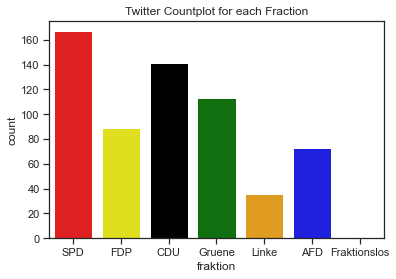

In [37]:
sns.countplot(x="fraktion",data=df,palette=["red", "yellow", "black","green","orange","blue","purple"]).set(title='Twitter Countplot for each Fraction')
#Verteilung SPD, CD am meisten gefolgt von Grüne,

In [18]:
df.loc[df['fraktion'] == "Fraktionslos"] #nicht nötig?

,bundestag_id,nachname,vorname,wp,fraktion,full_name,twitter_handle,account_type,activity
228,11005079,Helferich,Matthias,20,Fraktionslos,Matthias Helferich,MatthiasMdb,person,1.0


<AxesSubplot:xlabel='activity', ylabel='count'>

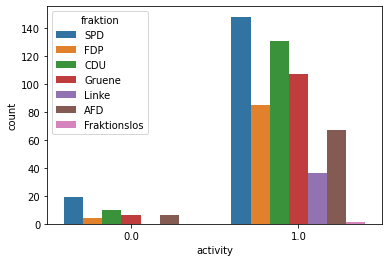

In [25]:
sns.countplot(x="activity",hue="fraktion",data=df) 
#countplot für account die nicht stark active sind für jeweilige Partei SPD am stärksten

<AxesSubplot:xlabel='activity', ylabel='count'>

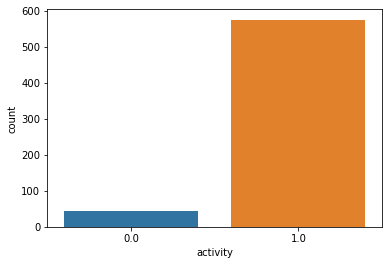

In [28]:
sns.countplot(x="activity",data=df)

In [30]:
df.loc[df['activity'] == 0] #die meiner Meinung wenig aktive waren 
#-> Überprüfen ob es sich lohnt die zu behalten

,bundestag_id,nachname,vorname,wp,fraktion,full_name,twitter_handle,account_type,activity
10,11004241,Albani,Stephan,20,CDU,Stephan Albani,Stephan_Alban,person,0.0
12,11004655,Altenkamp,Norbert Maria,20,CDU,Norbert Maria Altenkamp,NAltenkamp,person,0.0
33,11004947,Baradari,Nezahat,20,SPD,Nezahat Baradari,NBaradari,person,0.0
35,11003496,Bartol,Sören,20,SPD,Sören Bartol,soerenbartol,person,0.0
44,11005021,Becker,Holger,20,SPD,Holger Becker,Holger_SciTec,person,0.0
132,11005052,Englhardt-Kopf,Martina,20,CDU,Martina Englhardt-Kopf,EnglhardtKopf,person,0.0
143,11004270,Fechner,Johannes,20,SPD,Johannes Fechner,FechnerJohannes,person,0.0
144,11004271,Feiler,Uwe,20,CDU,Uwe Feiler,UweFe,person,0.0
162,11005059,Gambir,Schahina,20,Gruene,Schahina Gambir,schahinag,person,0.0
165,11004278,Gastel,Matthias,20,Gruene,Matthias Gastel,MatthiasGastel,person,0.0


# New dataset

In [31]:
df.to_csv("final_user.csv")